 # K-Nearest Neighbors (KNN) 

* KNN is a supervised machine learning algorithm used for classification and sometimes regression. It's one of the simplest and most intuitive algorithms.




### 🔍 **Basic Idea**

> To classify a new data point, KNN looks at the "K" nearest labeled data points in the training set and assigns the **most common class** among them to the new point.

---

### 🪜 **How KNN Works (Step-by-Step)**

#### 1. **Choose the value of K**

* K is the number of nearest neighbors to consider (e.g., 3, 5).
* If `k=3`, it looks at the 3 closest neighbors.

#### 2. **Calculate distance**

* Find the distance between the new point and all the training data points.
* The most common distance metric is **Euclidean distance**:

$$
\text{Distance} = \sqrt{(x_1 - y_1)^2 + (x_2 - y_2)^2 + \ldots + (x_n - y_n)^2}
$$

#### 3. **Find the K nearest neighbors**

* Sort all distances in ascending order and pick the top K closest points.

#### 4. **Majority vote**

* Among the K neighbors, check their class labels.
* The class with the highest frequency (most votes) becomes the predicted class.

#### 5. **Assign class**

* Assign the majority class to the new data point.

---

### 📦 **Example (With 2 Classes)**

Imagine you're classifying whether a fruit is an **apple** or **orange** based on weight and color:

| Weight | Color Score | Fruit  |
| ------ | ----------- | ------ |
| 150g   | 1.0         | Apple  |
| 170g   | 1.2         | Apple  |
| 180g   | 0.8         | Orange |
| 160g   | 0.9         | Orange |

Now, to classify a new fruit (165g, 1.0):

* Calculate distance from all above.
* Pick 3 closest points.
* If 2 are apples and 1 is orange → predict: **Apple**.

---

### ⚙️ **Hyperparameter: K**

* **Low K (e.g., 1)** → very sensitive to noise (overfitting).
* **High K (e.g., 10+)** → more general, but can underfit.
* **Odd values** are preferred to avoid ties.

---

### 🟢 **Advantages**

* Simple to implement.
* No training phase (just stores the data).
* Works well for smaller datasets.

---

### 🔴 **Disadvantages**

* **Slow for large datasets** (since it must compute distance to every training point).
* **Sensitive to irrelevant features** or noisy data.
* **Requires feature scaling** (because distance matters).

---

### 📈 **Use Cases**

* Classifying text (spam/ham)
* Image recognition
* Recommender systems
* Medical diagnosis

---




 Accuracy      : 93.33 %
 Precision     : 93.33 %
 Recall        : 93.33 %
 F1 Score      : 93.33 %

 Correct Predictions : 28
 Wrong Predictions   : 2

 Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         7
  versicolor       0.88      0.88      0.88         8
   virginica       0.93      0.93      0.93        15

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30



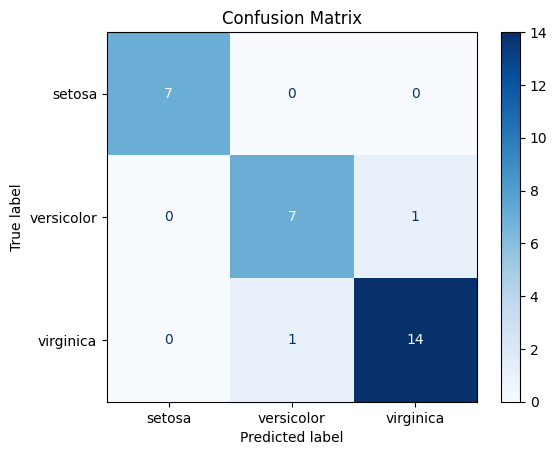

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    classification_report, accuracy_score,
    precision_score, recall_score, f1_score
)
import matplotlib.pyplot as plt

# Load the dataset
irisData = load_iris()
X = irisData.data
y = irisData.target

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=435)

# KNN with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Correct/Wrong Predictions
correct = sum(y_pred == y_test)
wrong = sum(y_pred != y_test)

# Print Results
print(f"\n Accuracy      : {round(accuracy * 100, 2)} %")
print(f" Precision     : {round(precision * 100, 2)} %")
print(f" Recall        : {round(recall * 100, 2)} %")
print(f" F1 Score      : {round(f1 * 100, 2)} %")

print(f"\n Correct Predictions : {correct}")
print(f" Wrong Predictions   : {wrong}")

# Classification report
print("\n Classification Report:")
print(classification_report(y_test, y_pred, target_names=irisData.target_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=irisData.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


Accuracy: 93.33 %
